# Impfquote im Kanton Zürich
Datum: 16.09.2021

Die Open-Data-Fachstelle des Kantons Zürich hat am 14.9.2021 neue Datensätze zur [#Covid19-Impfkampagne im Kanton Zürich](https://github.com/openZH/covid_19_vaccination_campaign_ZH) veröffentlicht und dies per [Tweet]( https://twitter.com/OpenDataZH/status/1437778195407941642) kommuniziert. 

In einem der Datensätze ist die Anzahl Impfungen pro Postleitzahl im Vergleich zur Bevölkerung enthalten. Ich habe mich gefragt, weshalb ich noch nie eine **Karte zum Anteil der geimpften pro PLZ im Kanton Zürich** gesehen habe. 
Deshalb spiele ich das hier mal durch und vermute, dass ich auf folgende Fragen stossen werde:

- Wie einfach ist die Datenaufbereitung der Geodaten der auf dem [Open-Data-Katalog der Post](https://swisspost.opendatasoft.com/pages/home/) verfügbaren [PLZ-Verzeichnis v2](https://swisspost.opendatasoft.com/explore/dataset/plz_verzeichnis_v2/information/?disjunctive.postleitzahl)?
- Bei Impfquoten scheint mir, dass in der Regel die Gesamtbevölkerung betrachtet wird. Wäre es nicht sinnvoller die Bevölkerung im 'impffähigen Alter' auszuweisen? Da Kinder bis 12 ja noch gar nicht geimpft werden können, sollte man diese für die Impfquote auch nicht berücksichtigen. Zumindest wenn man den 'Erfolg' der Impfkampagne messen möchte.

Nachtrag: Unterdessen sind alle Indikatoren und Daten interaktiv Visualisiert von Robert Salzer ([@robsalzer](https://twitter.com/rob_salzer)) auf seinem grossartigen Portal unter https://rsalzer.github.io/COVID_19_KT_ZH/

<!---  
Dieses Notebook verwendet als Vorlage die Webseite «[Kitas in Berlin - Jupyter Notebook](https://juanitorduz.github.io/kitas_berlin/)» 
---!>

Mit Colab kann **dieses Jupyter-Notebook interaktiv im Browser** gestartet werden:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DonGoginho/myPy_RIS_API/blob/main/RIS_API_AL_Geschaefte.ipynb)



**Inhaltsverzeichnis:**

1. [Datenaufbereitung](#Datenaufbereitung)
2. [Daten prüfen](#)
3. [Daten analysieren](#Explorative_Analyse)



In [1]:
#%pip install geopandas fiona requests folium mplleaflet contextily

## Importiere notwendige Packages:

In [189]:
import numpy as np
import pandas as pd
import geopandas as gpd
import altair as alt
import fiona; 
import mplleaflet
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns




Optionale Settings

In [3]:
pd.options.display.float_format = '{:.0f}'.format
#pd.set_option('display.width', 100)
#pd.set_option('display.max_columns', 15)

In [4]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

## Datenaufbereitung



### Datenquellen: ###

1. Geodaten [PLZ-Verzeichnis der Post](https://swisspost.opendatasoft.com/explore/dataset/plz_verzeichnis_v2/download/?format=shp&timezone=Europe/Berlin&lang=de) (shp, Geodaten)
2. Metadaten [PLZ-Verzeichnis v2](https://swisspost.opendatasoft.com/explore/dataset/plz_verzeichnis_v2/information/?disjunctive.postleitzahl)
3. Statistische Daten [Kumulierte Anzahl Impfungen nach Postleitzahl pro Kalenderwoche ab 18.01.2021](https://raw.githubusercontent.com/openZH/covid_19_vaccination_campaign_ZH/master/COVID19_Impfungen_pro_Woche_PLZ.csv) (csv, statistische Daten)
4. Detaillierte Doku (Metadaten) [Kumulierte Anzahl Impfungen nach Postleitzahl pro Kalenderwoche ab 18.01.2021](https://github.com/openZH/covid_19_vaccination_campaign_ZH) (Github)


### Datenaufbereitung des «PLZ Verzeichnis der Post (v2)» zu vierstelligen PLZ des Kantons Zürich

Die Geodaten aus dem **PLZ Verzeichnis** der Post entsprechen NICHT den vierstelligen Postleitzahlen (PLZ4), welche bei den statistischen Daten des Kantons Zürich und auch in aderen häufig verwendeten statistischen Daten verwendet werden. Sie sind umfangreicher und enthalten auch nicht territoriale PLZ. Daher müssen sie noch für die Verwendung aufbereitet werden. Leider sind die Metadaten zum PLZ Verzeichnis unvollständig. Daher beruht meine Datenaufbereitung auf einigen Annahmen und Erfahrungswerten.

Die Geodaten der Post können grundsätzlich entweder als [Shapefile oder GeoJSON-Datei heruntergeladen](https://swisspost.opendatasoft.com/explore/dataset/plz_verzeichnis_v2/export/?disjunctive.postleitzahl) oder per [API-request](https://swisspost.opendatasoft.com/explore/dataset/plz_verzeichnis_v2/api/) abgefragt werden.

Da die PLZ statische Objekte sind, die sich zeitlich nicht täglich ändern, verwende ich hier für die Datenaufbereitung die Option über den Datendownload via [Export](https://swisspost.opendatasoft.com/explore/dataset/plz_verzeichnis_v2/export/?disjunctive.postleitzahl) vom Datenkatalog herunter. Die Abfrage via API wäre natürlich effizienter, da wir bereits schon nur die für den Kanton Zürich relevanten PLZ herunter laden könnten.


#### Importiere die Shapefiles

Um mit Geodaten zu arbeiten, verwenden wir hier Geopandas.

`Alle Infos zu **Geopandas** findest Du hier https://geopandas.org/docs/user_guide/io.html`

Zum ersten Bezug können die Daten als Shapefile herunter geladen werden. Für weitere Verwendungen wäre aber das lokale speichern natürlich von Vorteil. 

In [7]:
#Direkter Shapefile-Import

#url_shp = "https://swisspost.opendatasoft.com/explore/dataset/plz_verzeichnis_v2/download/?format=shp&timezone=Europe/Berlin&lang=de"

gdf_plz6_ch = gpd.read_file(url_shp)
print('done')



done


In [8]:
gdf_plz6_ch.head()


,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,sprachcode,sprachcode_,briefz_durc,gilt_ab_dat,plz_briefzu,plz_coff,geometry
0,01,111,5586,80,1000,07,1000,Lausanne St-Paul,Lausanne St-Paul,VD,2,None,130,1993-09-28,100060,None,None
1,01,118,5586,80,1000,17,1000,Lausanne 17,Lausanne 17,VD,2,None,130,1986-05-21,100060,None,None
2,01,119,5586,80,1000,19,1000,Lausanne 19,Lausanne 19,VD,2,None,130,1993-09-28,100060,None,None
3,01,120,5586,80,1000,20,1000,Lausanne Sévelin,Lausanne Sévelin,VD,2,None,130,1993-09-06,100060,None,None
4,01,125,5586,20,1000,25,1000,Lausanne 25,Lausanne 25,VD,2,None,130,1988-03-01,100060,J,"POLYGON ((6.67378 46.56541, 6.67381 46.56564, ..."


#### Selektiere PLZ des Kantons Zürich ####

In [34]:
gdf_plz6_ktzh = gdf_plz6_ch.query('kanton =="ZH"')
#gdf_plz6_ktzh = gdf_plz6_ch.query('kanton =="ZH" & plz_coff =="J"')
#gdf_plz6_ktzh.head(200)
gdf_plz6_ktzh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 472 entries, 1024 to 5274
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rec_art      472 non-null    object  
 1   onrp         472 non-null    float64 
 2   bfsnr        472 non-null    float64 
 3   plz_typ      472 non-null    float64 
 4   postleitzah  472 non-null    object  
 5   plz_zz       472 non-null    object  
 6   gplz         472 non-null    float64 
 7   ortbez18     472 non-null    object  
 8   ortbez27     472 non-null    object  
 9   kanton       472 non-null    object  
 10  sprachcode   472 non-null    float64 
 11  sprachcode_  0 non-null      object  
 12  briefz_durc  472 non-null    float64 
 13  gilt_ab_dat  472 non-null    object  
 14  plz_briefzu  472 non-null    float64 
 15  plz_coff     298 non-null    object  
 16  geometry     297 non-null    geometry
dtypes: float64(7), geometry(1), object(9)
memory usage: 66.4+ KB


In [35]:
#gdf_plz6_ktzh.plot()

#### Selektiere die vierstelligen PLZ des Kantons Zürich ####
Es gibt nicht-territoriale sechstellig PLZ. Soweit ich das verstanden habe, können diese mit plz_coff = 'J' herausgefiltert werden. So wie es aussieht sind jene wo plz_coff = 'None' haben keine geografischen Grenzen. Offiziell heisst es bei der Post zur Bedeutung von plz_coff «Das Flag zeigt an, ob an der entsprechenden Domizil-PLZ ausschliesslich offizielle Gebäudeadressen enthalten sind.Die Information bezieht sich also nicht darauf, ob die PLZ offiziell oder nicht offiziell ist».

Vierstellige PLZ sind eigentlich nur in Kombination mit der Ortsbezeichnung, also z.B. **8105-Regensdorf** oder **8105-Watt**, eindeutig. Die statistischen Daten des Kantons kommen aber nur via vierstelliger PLZ. Daher müssen die Grenzen der beiden Gebiete noch zusammengelegt werden. 

In [37]:
gdf_plz4_ktzh_sel = gdf_plz6_ktzh.query('plz_coff =="J"')
#gdf_plz4_ktzh_sel = gdf_plz6_ch.query('plz_coff =="J" & postleitzah == "8105"')
gdf_plz4_ktzh_sel.head()
#gdf_plz4_ktzh_sel.info()

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,sprachcode,sprachcode_,briefz_durc,gilt_ab_dat,plz_briefzu,plz_coff,geometry
1024,01,4387,261,20,8003,00,8000,Zürich,Zürich,ZH,1,None,10575,1990-01-01,803660,J,"POLYGON ((8.52294 47.36414, 8.52236 47.36383, ..."
1025,01,4388,261,20,8004,00,8000,Zürich,Zürich,ZH,1,None,9741,1990-01-01,801500,J,"POLYGON ((8.52823 47.36888, 8.52819 47.36886, ..."
1026,01,4391,261,20,8006,00,8000,Zürich,Zürich,ZH,1,None,7303,1990-01-01,805060,J,"POLYGON ((8.55064 47.37448, 8.55017 47.37439, ..."
1031,01,4441,261,10,8032,00,8000,Zürich,Zürich,ZH,1,None,4443,1990-01-01,803260,J,"POLYGON ((8.57443 47.35700, 8.57421 47.35711, ..."
1035,01,4461,261,10,8046,00,8000,Zürich,Zürich,ZH,1,None,7303,1990-01-01,805060,J,"POLYGON ((8.52463 47.43126, 8.52464 47.43126, ..."


<AxesSubplot:>

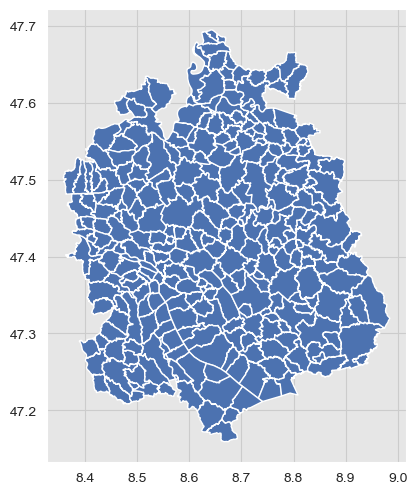

In [38]:
gdf_plz4_ktzh_sel.plot()

#### Geometrische Vereinigung (dissolve) von Dubletten bei vierstelligen ####
Wenn man die aufbereiteten Daten auf Doubletten überprüft, so sieht man, dass es noch einige PLZ4 gibt, die eigentlich - basierend auf dem Attribut `postleitzah` - zusammen gehören, aber zwei geometrische Objekte darstellen, da sie wie oben erwähnt nur in Kombination mit dem Namen eindeutig sind. Deshalb identifizieren wir hier zuerst einmal die Doubletten der `postleitzah`und vereinigen in einem zweiten Schritt diese Objekte zu einem geometrischen Objekt.

1. **Wo kommen PLZ4 doppelt vor?** (checke mit `duplicated` und zeige die ersten Doppelten Objekte an)



Duplicate Rows except first occurrence based on 'postleitzah' columns are :


<AxesSubplot:>

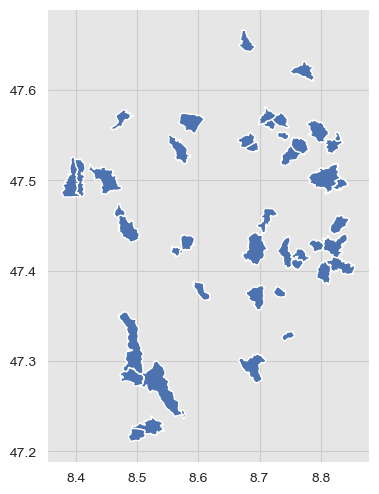

In [39]:
# Select duplicate rows except first occurrence based the variable `postleitzah'
duplicateRowsDF = gdf_plz4_ktzh_sel[gdf_plz4_ktzh_sel.postleitzah.duplicated(keep="first")]
print("Duplicate Rows except first occurrence based on 'postleitzah' columns are :")
#print(duplicateRowsDF)
duplicateRowsDF.plot()

2. **Vereinigung der Doubletten**

Dazu verwenden wir die GIS-Methode [**`dissolve`**](https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.dissolve.html?highlight=dissolve).

<AxesSubplot:>

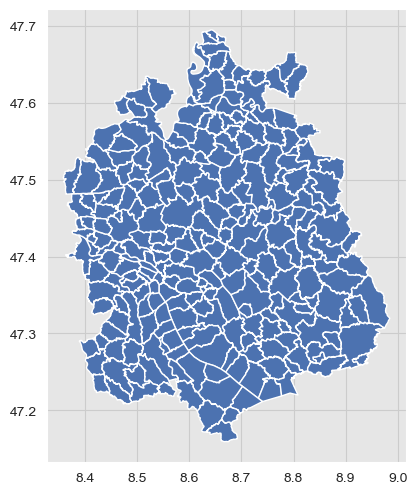

In [40]:
gdf_plz4_ktzh_dissolved = gdf_plz4_ktzh_sel.dissolve(by='postleitzah', aggfunc='first', as_index=False, level=None, sort=True, observed=False, dropna=True)

gdf_plz4_ktzh_dissolved.plot()

#Check on duplicates again:
#duplicateRowsDF = gdf_plz4_ktzh_dissolved[gdf_plz4_ktzh_dissolved.postleitzah.duplicated(keep="first")]
#print(duplicateRowsDF)


In [172]:
#gdf_plz4_ktzh_dissolved.info()

#### PLZ4-Gebiete des Kantons ZH fertig stellen ####

Damit haben wir die PLZ-Geodaten, wie wir sie für die weiteren Schritte benötigen. Daher benenne ich den GeoDataFrame als `gdf_plz4_ktzh`



In [173]:
gdf_plz4_ktzh = gdf_plz4_ktzh_dissolved


Zur weiteren Bearbeitung in anderen Tools kann ich sie auch als Geodaten abspeichern.
Hier z.B. als GeoJSON-File und als GeoPackage

In [43]:
gdf_plz4_ktzh.to_file("./output/plz4_ktzh.geojson", driver='GeoJSON')

gdf_plz4_ktzh.to_file("./output/plz4_ktzh.gpkg", layer='plz4_ktzh', driver="GPKG")

### Statistische Daten der COVID19-Impfkampagne einlesen


Die statistischen #OpenData Daten [Kumulierte Anzahl Impfungen nach Postleitzahl pro Kalenderwoche ab 18.01.2021](https://raw.githubusercontent.com/openZH/covid_19_vaccination_campaign_ZH/master/COVID19_Impfungen_pro_Woche_PLZ.csv) (csv, statistische Daten) sollen eingelesen und die aktuellsten Zahlen den PLZ4 zugeordnet werden. Hier gibt es noch eine ausführliche [Doku (Metadaten)](https://github.com/openZH/covid_19_vaccination_campaign_ZH) (Github) zum Datensatz.



In [72]:
# Filepath
fp = r"https://raw.githubusercontent.com/openZH/covid_19_vaccination_campaign_ZH/master/COVID19_Impfungen_pro_Woche_PLZ.csv"

# Read the data
pd_covid19_impf_woche_plz4 = pd.read_csv(
    fp, 
    sep=',',
    parse_dates=True,
    low_memory=False    
    )
pd_covid19_impf_woche_plz4.head(20000)

,week_from,week_until,calendar_week,plz,population,ncumul_firstvacc,ncumul_secondvacc
0,2021-01-01,2021-01-24,3,8001,5473,136,0
1,2021-01-01,2021-01-24,3,8002,9620,188,0
2,2021-01-01,2021-01-24,3,8003,20655,275,0
3,2021-01-01,2021-01-24,3,8004,27183,290,0
4,2021-01-01,2021-01-24,3,8005,15505,165,0
...,...,...,...,...,...,...,...
8631,2021-09-06,2021-09-12,36,8955,2505,1583,1394
8632,2021-09-06,2021-09-12,36,andere Kantone,NaN,7782,6900
8633,2021-09-06,2021-09-12,36,Nachbarkantone,NaN,28404,25014
8634,2021-09-06,2021-09-12,36,unbekannt,NaN,7734,6762


In [174]:
#pd_covid19_impf_woche_plz4.dtypes

#### Selektion und Berechnungen ####
Welche Kalenderwoche soll ausgewählt werden?
Hier bestimme ich mal die aktuellste Kalenderwoche.

In [74]:
latest_week = pd_covid19_impf_woche_plz4.calendar_week.max()
print(latest_week)


36


In [213]:
sel_covid19_impf_woche_plz4_development = (
    pd_covid19_impf_woche_plz4.query("calendar_week > @latest_week-12")
    .assign(
        prcFirstVac=lambda x: 100-(x.population - x.ncumul_firstvacc)/x.population*100 ,
        prcSecVac=lambda x: 100-(x.population - x.ncumul_secondvacc)/x.population*100,
    )
    .sort_values('prcSecVac', ascending=True)
    #.head(200)
)
sel_covid19_impf_woche_plz4 = pd_covid19_impf_woche_plz4.query("calendar_week > @latest_week-1")

In [212]:
alt.Chart(sel_covid19_impf_woche_plz4_development).mark_circle(size=60).encode(
    x='plz', #QuarLang
    y='prcSecVac',
    color=alt.Color('calendar_week', scale=alt.Scale(scheme='blues')),
    tooltip=['plz','prcSecVac','week_from']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

In [214]:
#sel_covid19_impf_woche_plz4.plot(kind="scatter", x="plz", y="prcSecVac")


### Importiere Städtische Datgen
Importiere zum Test Daten von Statistik Stadt Zürich von **Anzahl Personen nach impffähigen Alter** in der Stadt Zürich, Stand 31.12.2020.

In [298]:
# Filepath
fp = r"./ssz_plz4_impffaehiges_alter/wbev_plz_impffaehiges-alter_aktJahresbest.csv"


# Read the data
ssz_wbev_alter= pd.read_csv(
    fp, 
    sep=',',
    parse_dates=True,
    low_memory=False    
    )
ssz_wbev_alter.head(2)

,Beob.,StichtagDatJahr,PLZ,impffaehiges_alter,AnzBestWir,AnzBest
0,1,2020,8001,impffaehig,5453,6206
1,2,2020,8001,unter13,391,399


Erstelle einen DataFrame mit der Anzahl Personen pro PLZ total. Unabhänig vom Alter.

In [299]:
#ssz_wbev_impffaehiges_alter.head(2)

ssz_total_wbev_plz=ssz_wbev_alter[["PLZ", "AnzBestWir"]].groupby(['PLZ']).sum()



In [300]:
ssz_total_wbev_plz = ssz_total_wbev_plz.rename(columns={"AnzBestWir": "stzh_TotalWBev"})

In [301]:
ssz_total_wbev_plz.head(2)


,stzh_TotalWBev
PLZ,
8001,5844
8002,9820


Erstlle ein DF mit den Personen im impffähigen Alter. Lösche dabei noch die Personen in PLZ, die mehrheitlich ausserhalb der Stadtgebiets liegen (PLZ >8099). Dies liegt daran, dass die Gemeindegrenzen und die PLZ-Grenzen überlappend sind.

In [302]:
ssz_wbev_impffaehiges_alter = (
    ssz_wbev_alter.query("impffaehiges_alter == 'impffaehig' & PLZ<8100 & AnzBestWir>3")
    .assign(
        #AnzUeber13J=lambda x: impffaehiges_alter == 'impffaehig',
    )
    .sort_values('PLZ', ascending=True)
)

In [303]:
#ssz_wbev_impffaehiges_alter

#### Joine die Daten
Damit die `PLZ` aus den Daten der Stadt Zürich mit den `plz` des Kantons gejoint werden können, müssen sie gleich heissen UND vom gleichen Typ sein. 
Hier wird eine neue Variable als String erstellt.

In [305]:
ssz_wbev_impffaehiges_alter['plz'] = ssz_wbev_impffaehiges_alter['PLZ'].astype(str)
ssz_wbev_impffaehiges_alter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 48
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Beob.               24 non-null     int64 
 1   StichtagDatJahr     24 non-null     int64 
 2   PLZ                 24 non-null     int64 
 3   impffaehiges_alter  24 non-null     object
 4   AnzBestWir          24 non-null     int64 
 5   AnzBest             24 non-null     int64 
 6   plz                 24 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.5+ KB


Als nächster Schritt wähle ich nur die relevanten Attribute aus und benenne diese wo sinnvoll um. Hier bedeutet `AnzPersUe12`die Anzahl Personen der wirtschaftlichen Wohnbevölkerung der Stadt Zürich, die über 12 Jahre alt ist.

In [306]:
ssz_wbev_impffaehiges_alter2join = ssz_wbev_impffaehiges_alter[["plz","PLZ","AnzBestWir"]]
ssz_wbev_impffaehiges_alter2join = ssz_wbev_impffaehiges_alter2join.rename(columns={"AnzBestWir": "stzh_AnzPersUe12"})
#ssz_wbev_impffaehiges_alter2join.info()

Und das gleiche noch mit den Kantonalen Daten:

In [307]:
sel_covid19_impf_woche_plz42join = sel_covid19_impf_woche_plz4[["calendar_week","plz","population","ncumul_firstvacc","ncumul_secondvacc"]]
#sel_covid19_impf_woche_plz42join = sel_covid19_impf_woche_plz4[["plz","population","ncumul_firstvacc","ncumul_secondvacc","prcFirstVac","prcSecVac","calendar_week"]]
sel_covid19_impf_woche_plz42join =sel_covid19_impf_woche_plz42join.rename(columns={"population": "ktzh_AnzPersTotal", "ncumul_firstvacc": "ktzh_ncumul_firstvacc", "ncumul_secondvacc": "ktzh_ncumul_secondvacc"})
sel_covid19_impf_woche_plz42join.head(2)

,calendar_week,plz,ktzh_AnzPersTotal,ktzh_ncumul_firstvacc,ktzh_ncumul_secondvacc
8382,36,8001,5473,4327,3798
8383,36,8002,9620,6882,6258


In [308]:
#sel_covid19_impf_woche_plz4.info()

Nun joine, resp. merge, ich die Daten der Stadt Zürich mit den Angaben des Kantons Zürich zusammen.
In der Stadt wird die numerische `PLZ`, beim Kanton der string `plz` verwendet.

In [316]:
join_ssz_a = ssz_wbev_impffaehiges_alter2join.merge(ssz_total_wbev_plz, on=["PLZ"])

join_ssz_kt = join_ssz_a.merge(sel_covid19_impf_woche_plz42join, on=["plz"])
#country_shapes = country_shapes.merge(country_names, on='iso_a3')

join_ssz_kt.head(2)

,plz,PLZ,stzh_AnzPersUe12,stzh_TotalWBev,calendar_week,ktzh_AnzPersTotal,ktzh_ncumul_firstvacc,ktzh_ncumul_secondvacc
0,8001,8001,5453,5844,36,5473,4327,3798
1,8002,8002,8437,9820,36,9620,6882,6258


In [320]:
compare_ssz_kt = (
    join_ssz_kt.query(" stzh_AnzPersUe12 > 0")
    .assign(
        prc_ktzh_1Vac=lambda x: 100-(x.ktzh_AnzPersTotal - x.ktzh_ncumul_firstvacc)/x.ktzh_AnzPersTotal*100 ,
        prc_ktzh_2Vac=lambda x: 100-(x.ktzh_AnzPersTotal - x.ktzh_ncumul_secondvacc)/x.ktzh_AnzPersTotal*100,
        prc_stzh_1Vac=lambda x: 100-(x.stzh_AnzPersUe12 - x.ktzh_ncumul_firstvacc)/x.stzh_AnzPersUe12*100 ,
        prc_stzh_2Vac=lambda x: 100-(x.stzh_AnzPersUe12 - x.ktzh_ncumul_secondvacc)/x.stzh_AnzPersUe12*100,
        diff_prc_stzh_ktzh_2Vac=lambda x: x.prc_stzh_2Vac - x.prc_ktzh_2Vac ,
        diff_totalPop_stzh_ktzh=lambda x: x.stzh_TotalWBev - x.ktzh_AnzPersTotal ,
    )
    .sort_values('diff_totalPop_stzh_ktzh', ascending=False)
    
)

In [321]:
compare_ssz_kt.head(50)

,plz,PLZ,stzh_AnzPersUe12,stzh_TotalWBev,calendar_week,ktzh_AnzPersTotal,ktzh_ncumul_firstvacc,ktzh_ncumul_secondvacc,prc_ktzh_1Vac,prc_ktzh_2Vac,prc_stzh_1Vac,prc_stzh_2Vac,diff_prc_stzh_ktzh_2Vac,diff_totalPop_stzh_ktzh
22,8057,8057,19925,23045,36,21221,14955,13545,70,64,75,68,4,1824
17,8050,8050,26390,30556,36,28957,19349,17500,67,60,73,66,6,1599
5,8006,8006,17108,19379,36,18387,13789,12725,75,69,81,74,5,992
6,8008,8008,15720,17545,36,16571,12605,11529,76,70,80,73,4,974
3,8004,8004,25881,28113,36,27183,19230,16993,71,63,74,66,3,930
16,8049,8049,21023,24405,36,23561,16339,15023,69,64,78,71,8,844
13,8046,8046,22285,26420,36,25704,14917,13279,58,52,67,60,8,716
8,8037,8037,14705,16634,36,16044,11438,10379,71,65,78,71,6,590
19,8052,8052,17838,20863,36,20277,11689,10324,58,51,66,58,7,586
18,8051,8051,20380,23550,36,23000,12969,11510,56,50,64,56,6,550


Komische Unterschiede ...

In [421]:
#test=gdf_plz4_ktzh.query('postleitzah == "8125" | postleitzah == "8134" | postleitzah == "8142" | postleitzah == "8143" | postleitzah == "8152"')
#test.plot()

In [46]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html

## Explorative_Analyse
One of the main objectives of this notebook is to do an exploratory data analysis to understand which questions this data set can answer. In addition, also determine its limitations. 

To begin, let us get the number of unique values per feature.


In [120]:
df_briefkaesten_zuerich.head(2)

,Id,POITypeId,POIName_de,address_city,address_kantoncode,address_zip,address_countrycode,address_street,address_gemeindeid,geopoint,poityp_de
17829,003BE_00325052,003BE,"Briefeinwurf Zürich, BE Bushaltestelle Glaubte...",Zürich,ZH,8046,CH,Wehntalerstrasse 374,261,"47.41407433,8.52014398",Briefeinwurf
18493,003BE_00324763,003BE,"Briefeinwurf Zürich, Bleicherweg",Zürich,ZH,8002,CH,Bleicherweg 19,261,"47.36781255,8.53569237",Briefeinwurf


In [106]:
df_briefkaesten_zuerich.apply(lambda x: x.unique().size, axis=0)


Id                     475
POITypeId                1
POIName_de             427
address_city             1
address_kantoncode       1
address_zip             24
address_countrycode      1
address_street         451
address_gemeindeid       1
geopoint               468
poityp_de                1
dtype: int64

In welcher PLZ gibt es am meisten Briefkästen?

In [101]:
 #   .query('kategorie == "Parkbaum"') \
#    .agg(anz_baeume=('objid', 'count'), anz_kinder_va_sk=('objid', 'sum')) \
df_briefkaesten_zuerich \
    .groupby(['address_zip' ]) \
    .agg(anz_briefkaesten=('Id', 'count')) \
    .sort_values('anz_briefkaesten', ascending=False) \
    .head(5)


NameError: name 'df_briefkaesten_zuerich' is not defined

In [114]:
df_briefkaesten_zuerich \
    .groupby(['address_zip','POIName_de' ]) \
    .agg(anz_briefkaesten=('Id', 'count')) \
    .sort_values('address_zip', ascending=True) \
    .head(500)


anz_briefkaesten
address_zip POIName_de                                                          
8001        Briefeinwurf Zürich, BE Standseilbahn Bergstation                  1
            Briefeinwurf Zürich, Löwenstrasse                                  1
            Briefeinwurf Zürich, Mühlegasse                                    1
            Briefeinwurf Zürich, Paradeplatz                                   2
            Briefeinwurf Zürich, Passage Löwenstrasse                          1
...                                                                          ...
8057        Briefeinwurf Zürich, Birchstrasse                                  1
            Briefeinwurf Zürich, Milchbuckstrasse                              1
8064        Briefeinwurf Zürich, Tramendhaltestelle Werdhölzli                 1
            Briefeinwurf Zürich, Altersheim                                    1
            Briefeinwurf Zürich, Tramhaltestelle Tüffenwies                    1

[432 rows x 1 columns]